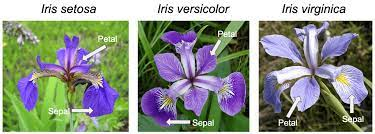

In [14]:
!pip install pandas-profiling

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=6a27687da6871d841d3b3ea25b20a6d5b426bb5e35f1b77747289dc58d80ee03
  Stored in directory: c:\users\arshi\appdata\local\pip\cache\wheels\1d\05\04\c6d7d3b66539d9e659ac6dfe81e2d0fd4c1a8316cc5a403300
Successfully built htmlmin


In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from pandas_profiling import ProfileReport

In [2]:
df = pd.read_csv('../Python/data/iris.data',header = None)

In [3]:
df.columns = ['sepal length in cm','sepal width in cm',
             'petal length in cm','petal width in cm','target']

In [4]:
df

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.target.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

In [6]:
df['target'] = np.where(df['target'] == 'Iris-setosa',1,0)

In [7]:
df.target.value_counts()

0    100
1     50
Name: target, dtype: int64

In [8]:
profile = ProfileReport(df,title='IRIS Profile Report')

In [9]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
### Building an Logistic model

In [11]:
x = df.drop('target',axis=1)
y = df.target

In [12]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state= 1)

In [14]:
# Base model
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [18]:
## Probabilites
train_proba = model.predict_proba(x_train)[:,1]
test_proba = model.predict_proba(x_test)[:,1]

In [17]:
train_proba.shape

(135, 2)

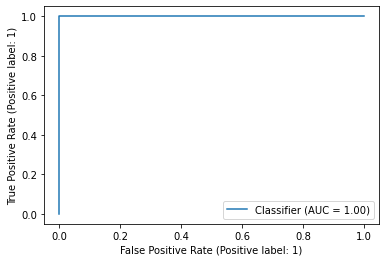

In [19]:
RocCurveDisplay.from_predictions(y_train,train_proba)

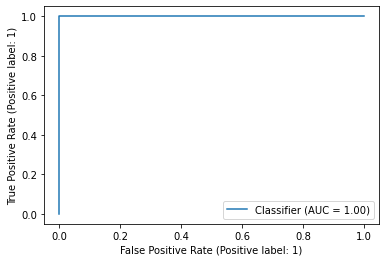

In [20]:
RocCurveDisplay.from_predictions(y_test,test_proba)

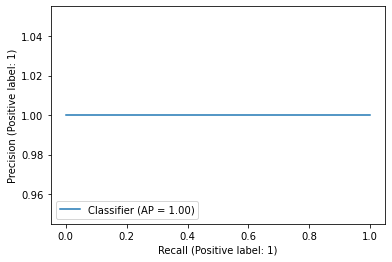

In [21]:
PrecisionRecallDisplay.from_predictions(y_train,train_proba)

In [22]:
precision, recall, thresholds = precision_recall_curve( y_train,train_proba)

<AxesSubplot:>

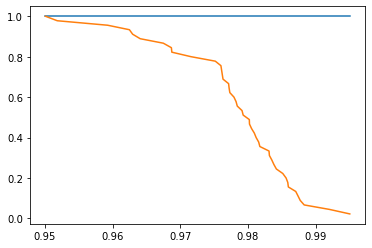

In [26]:
sns.lineplot(x=thresholds,y=precision[:-1])
sns.lineplot(x=thresholds,y=recall[:-1])

In [27]:
threshold = 0.5
train_pred = np.where(train_proba >=threshold,1,0)
test_pred = np.where(test_proba >= threshold,1,0)

In [28]:
for i,j in zip(y_test,test_pred):
    print(i,j)

1 1
0 0
0 0
1 1
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 1
0 0
0 0
0 0


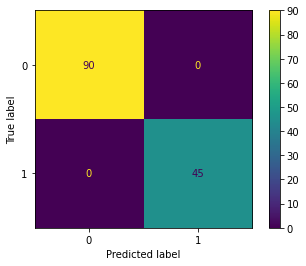

In [29]:
ConfusionMatrixDisplay.from_predictions(y_train,train_pred)

In [31]:
precision_score(y_train,train_pred)

1.0

In [32]:
recall_score(y_train,train_pred)

1.0

In [37]:
model.coef_

array([[-0.4702898 ,  0.79535004, -2.28863649, -0.9152267 ]])

<AxesSubplot:>

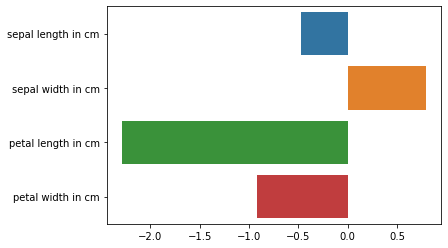

In [39]:
sns.barplot(y=np.array(x_train.columns),x =model.coef_[0])